<a href="https://colab.research.google.com/github/nithin1314/FML-lab/blob/main/cycle1_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [ ]:
data = pd.read_csv("Company_data.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [ ]:
X=data.drop('Sales',axis=1).values
y=data['Sales'].values

In [ ]:
X_r=X[:,0]

In [ ]:
X_r

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [ ]:
X_r.shape

(200,)

In [ ]:
X_r=X_r.reshape(-1,1)
y=y.reshape(-1,1)

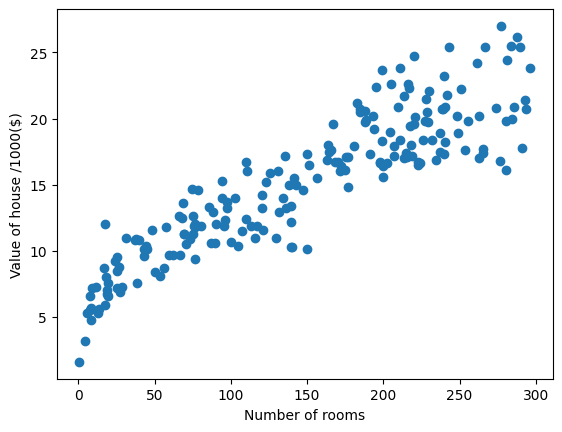

In [ ]:
plt.scatter(X_r, y)
plt.xlabel('Number of rooms')
plt.ylabel('Value of house /1000($)')
plt.show()

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_r, y)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_r)

print(f'MAE = {mean_absolute_error(y, y_pred)}')
print(f'MSE = {mean_squared_error(y, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'R_2 = {r2_score(y, y_pred)}')

MAE = 1.8305872641932412
MSE = 5.2177438977951285
RMSE = 2.2842381438447106
R_2 = 0.8121757029987414


In [ ]:
prediction_space = np.linspace(min(X_r), max(X_r)).reshape(-1,1)

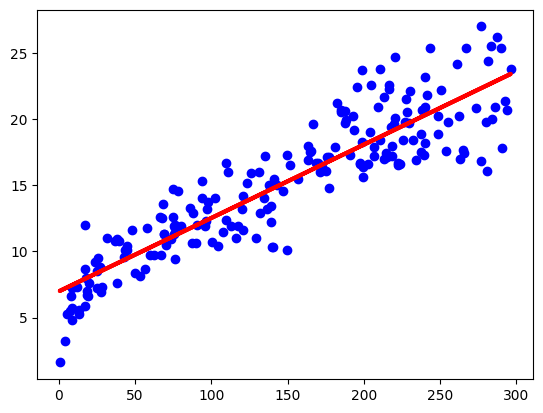

In [ ]:
plt.scatter(X_r, y, color='blue')
plt.plot(X_r, reg.predict(X_r), color='red', linewidth=3)
plt.show()

***LASSO regression***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((150, 3), (50, 3))

In [ ]:
reg = Lasso(alpha = 0.1)
reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred1 = reg.predict(X_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_pred1)}')
print(f'MSE = {mean_squared_error(y_train, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred1))}')
print(f'R_2 = {r2_score(y_train, y_pred1)}')

Performance of the model on training data :

MAE = 1.2876536180415137
MSE = 2.835300199761751
RMSE = 1.6838349680897327
R_2 = 0.8957740741508459


In [ ]:
y_pred2 = reg.predict(X_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')

Performance of the model on test data :

MAE = 1.1199317132206692
MSE = 2.4064594583927716
RMSE = 1.5512767188328367
R_2 = 0.911476780577433


In [ ]:
reg.score(X_test, y_test)

0.911476780577433

***RIDGE regrresion***

In [ ]:
reg = Ridge(alpha = 0.1)
reg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred1 = reg.predict(X_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_pred1)}')
print(f'MSE = {mean_squared_error(y_train, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred1))}')
print(f'R_2 = {r2_score(y_train, y_pred1)}')

Performance of the model on training data :

MAE = 1.2867991281457907
MSE = 2.8352482144356674
RMSE = 1.6838195314331246
R_2 = 0.8957759851367592


In [ ]:
y_pred2 = reg.predict(X_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')

Performance of the model on test data :

MAE = 1.1199949043744202
MSE = 2.4040713884290743
RMSE = 1.550506816634185
R_2 = 0.9115646273270035


In [ ]:
reg.score(X_test, y_test)

0.9115646273270035